In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\SURAJ
[nltk_data]     KUMAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
import sqlite3

In [5]:
con = sqlite3.connect( r"C:\Users\SURAJ KUMAR\Downloads\zomato project/zomato_rawdata.sqlite")

In [6]:
df = pd.read_sql_query("SELECT * FROM Users " , con)

In [7]:
df.head(1)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari


In [8]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [9]:
df.replace(('NEW', '-'), np.nan , inplace = True)

In [10]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [11]:
df['rate'] = df['rate'].apply(lambda x: float(x.split('/')[0]) if type(x) == str else x)

In [12]:
 x = pd.crosstab(df['rate'] , df['online_order'])

<Axes: xlabel='rate'>

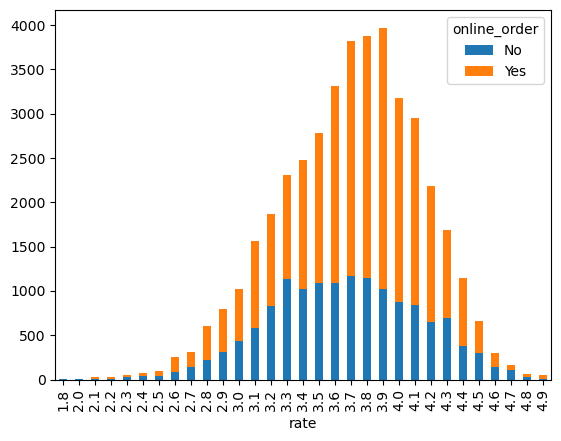

In [13]:
x.plot(kind = 'bar' , stacked = True )

In [14]:
y = x.sum(axis = 1).astype(float)

In [15]:
 z  = x.div(y,axis =0)

In [16]:
z

online_order,No,Yes
rate,,
1.8,1.000000,0.000000
2.0,1.000000,0.000000
2.1,0.375000,0.625000
2.2,0.384615,0.615385
2.3,0.568627,0.431373
2.4,0.514286,0.485714
2.5,0.376238,0.623762
2.6,0.319231,0.680769
2.7,0.459283,0.540717


<Axes: xlabel='rate'>

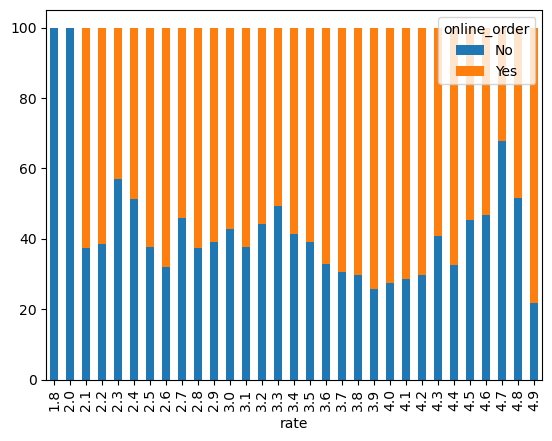

In [17]:
(z*100).plot(kind = 'bar' , stacked = True )

In [18]:
df['rest_type'].isnull().sum()

227

In [19]:
data = df.dropna(subset= ['rest_type'])

In [20]:
data['rest_type'].isnull().sum()

0

In [21]:
data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [22]:
quick_bites_df = data[data['rest_type'].str.contains('Quick Bites')]

In [23]:
quick_bites_df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [24]:
quick_bites_df['reviews_list']

3        [('Rated 4.0', "RATED\n  Great food and proper...
23       [('Rated 4.0', "RATED\n  So, went here with fr...
26       [('Rated 5.0', 'RATED\n  please provide some e...
31       [('Rated 1.0', "RATED\n  Worst restaurant ever...
34       [('Rated 3.0', 'RATED\n  Not worth for the mon...
                               ...                        
51641    [('Rated 2.0', "RATED\n  Food is not upto the ...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [('Rated 5.0', "RATED\n  I was randomly lookin...
Name: reviews_list, Length: 20639, dtype: object

In [25]:
quick_bites_df['reviews_list'] = quick_bites_df['reviews_list'].apply(lambda x : x.lower())

C:\Users\SURAJ KUMAR\AppData\Local\Temp\ipykernel_1344\4252139927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quick_bites_df['reviews_list'] = quick_bites_df['reviews_list'].apply(lambda x : x.lower())


In [26]:
from nltk.corpus import RegexpTokenizer

In [27]:
Tokenizer =RegexpTokenizer("[a-zA-Z]+")

In [28]:
quick_bites_df['reviews_list']

3        [('rated 4.0', "rated\n  great food and proper...
23       [('rated 4.0', "rated\n  so, went here with fr...
26       [('rated 5.0', 'rated\n  please provide some e...
31       [('rated 1.0', "rated\n  worst restaurant ever...
34       [('rated 3.0', 'rated\n  not worth for the mon...
                               ...                        
51641    [('rated 2.0', "rated\n  food is not upto the ...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [('rated 5.0', "rated\n  i was randomly lookin...
Name: reviews_list, Length: 20639, dtype: object

In [29]:
Tokenizer.tokenize(quick_bites_df['reviews_list'][3])

['rated',
 'rated',
 'n',
 'great',
 'food',
 'and',
 'proper',
 'karnataka',
 'style',
 'full',
 'meals',
 'been',
 'there',
 'twice',
 'and',
 'was',
 'fully',
 'satisfied',
 'will',
 'give',
 'stars',
 'if',
 'it',
 's',
 'well',
 'managed',
 'rated',
 'rated',
 'n',
 'reached',
 'the',
 'place',
 'at',
 'pm',
 'on',
 'saturday',
 'half',
 'of',
 'the',
 'items',
 'on',
 'the',
 'menu',
 'were',
 'over',
 'what',
 'was',
 'annoying',
 'was',
 'is',
 'the',
 'food',
 'was',
 'cold',
 'the',
 'taste',
 'was',
 'also',
 'very',
 'average',
 'only',
 'dosa',
 'and',
 'holige',
 'were',
 'good',
 'there',
 'were',
 'very',
 'few',
 'people',
 'in',
 'the',
 'restaurant',
 'and',
 'the',
 'service',
 'was',
 'still',
 'very',
 'slow',
 'the',
 'waiters',
 'were',
 'all',
 'standing',
 'in',
 'one',
 'corner',
 'and',
 'talking',
 'had',
 'to',
 'call',
 'them',
 'repeatedly',
 'rated',
 'rated',
 'n',
 'had',
 'been',
 'here',
 'good',
 'food',
 'served',
 'and',
 'tasty',
 'good',
 'plac

In [30]:
sample = data[0:1000]

In [31]:
reviews_tokens = sample['reviews_list'].apply(Tokenizer.tokenize)

In [32]:
from nltk.corpus import stopwords

In [33]:
stop = stopwords.words('english')

In [34]:
print (stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [35]:
stop.extend(['RATED',"N",'nan','x','Rated','rated','n'])

In [36]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [37]:
rev3 = reviews_tokens[3]

In [38]:
print([token for token in rev3 if token  not in stop])

['Great', 'food', 'proper', 'Karnataka', 'style', 'full', 'meals', 'Been', 'twice', 'fully', 'satisfied', 'Will', 'give', 'stars', 'well', 'managed', 'Reached', 'place', 'pm', 'Saturday', 'Half', 'items', 'menu', 'What', 'annoying', 'food', 'cold', 'The', 'taste', 'also', 'average', 'Only', 'dosa', 'holige', 'good', 'There', 'people', 'restaurant', 'service', 'still', 'slow', 'The', 'waiters', 'standing', 'one', 'corner', 'talking', 'Had', 'call', 'repeatedly', 'Had', 'good', 'food', 'served', 'tasty', 'good', 'place', 'go', 'freinds', 'family', 'first', 'get', 'served', 'well', 'food', 'One', 'good', 'hotel', 'price', 'How', 'Udupi', 'restaurant', 'dirty', 'floor', 'walls', 'waiters', 'stained', 'food', 'Why', 'cant', 'clean', 'The', 'floor', 'even', 'decorative', 'colour', 'paper', 'every', 'lot', 'food', 'Now', 'coming', 'taste', 'food', 'pretty', 'decent', 'chargw', 'What', 'upset', 'us', 'menu', 'says', 'serve', 'thambuli', 'two', 'variety', 'rice', 'etc', 'still', 'charged', 'us'

In [39]:
reviews_tokens_clean = reviews_tokens.apply(lambda each_review : [ token for token in each_review if token not in stop])

In [40]:
reviews_tokens_clean

0       [A, beautiful, place, dine, The, interiors, ta...
1       [Had, dinner, family, Turned, good, choose, su...
2       [Ambience, good, enough, pocket, friendly, caf...
3       [Great, food, proper, Karnataka, style, full, ...
4       [Very, good, restaurant, neighbourhood, Buffet...
                              ...                        
995     [Ideal, quick, neighborhood, bite, Has, good, ...
996     [We, ordered, Alankrutha, Special, Biryani, Mu...
997     [This, review, posted, year, ago, better, late...
998     [We, tried, Chicken, Shawarma, Some, Panner, G...
1000    [An, authentic, Andhra, cuisine, restaurant, s...
Name: reviews_list, Length: 1000, dtype: object

In [41]:
 total_reviews_2D = list(reviews_tokens_clean)

In [42]:
total_reviews_1D = []
for review in total_reviews_2D:
    for word in review:
        total_reviews_1D.append(word)

In [43]:
total_reviews_1D

['A',
 'beautiful',
 'place',
 'dine',
 'The',
 'interiors',
 'take',
 'back',
 'Mughal',
 'era',
 'The',
 'lightings',
 'perfect',
 'We',
 'went',
 'occasion',
 'Christmas',
 'limited',
 'items',
 'available',
 'But',
 'taste',
 'service',
 'compromised',
 'The',
 'complaint',
 'breads',
 'could',
 'better',
 'Would',
 'surely',
 'like',
 'come',
 'I',
 'dinner',
 'family',
 'weekday',
 'The',
 'restaurant',
 'completely',
 'empty',
 'Ambience',
 'good',
 'good',
 'old',
 'hindi',
 'music',
 'Seating',
 'arrangement',
 'good',
 'We',
 'ordered',
 'masala',
 'papad',
 'panner',
 'baby',
 'corn',
 'starters',
 'lemon',
 'corrionder',
 'soup',
 'butter',
 'roti',
 'olive',
 'chilli',
 'paratha',
 'Food',
 'fresh',
 'good',
 'service',
 'good',
 'Good',
 'family',
 'hangout',
 'nCheers',
 'Its',
 'restaurant',
 'near',
 'Banashankari',
 'BDA',
 'Me',
 'along',
 'office',
 'friends',
 'visited',
 'buffet',
 'unfortunately',
 'provide',
 'veg',
 'buffet',
 'On',
 'inquiring',
 'said',
 'pla

In [44]:
from nltk import FreqDist

In [45]:
fd = FreqDist()

In [46]:
for word in total_reviews_1D:
    fd[word] = fd[word]+1

In [47]:
fd.most_common(20)

[('good', 10260),
 ('I', 9887),
 ('food', 9105),
 ('place', 8470),
 ('The', 5433),
 ('taste', 3692),
 ('chicken', 3044),
 ('service', 2756),
 ('ordered', 2530),
 ('try', 2514),
 ('like', 2375),
 ('time', 2337),
 ('also', 2236),
 ('one', 2227),
 ('really', 2184),
 ('restaurant', 2120),
 ('It', 1991),
 ('order', 1839),
 ('nice', 1833),
 ('best', 1766)]

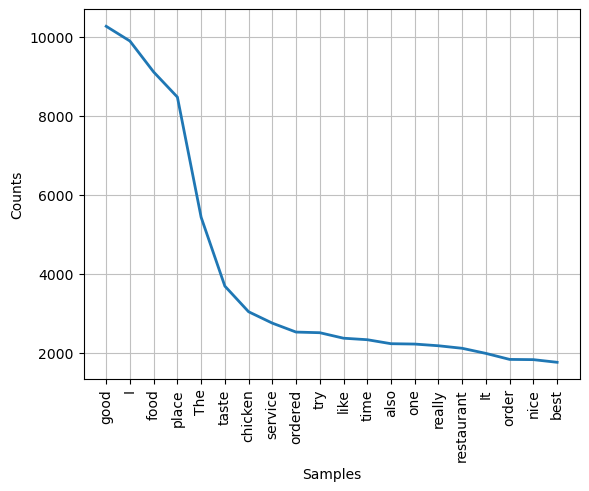

<Axes: xlabel='Samples', ylabel='Counts'>

In [48]:
fd.plot(20)

In [49]:
from nltk import FreqDist,bigrams , trigrams

In [50]:
bi_grams = bigrams(total_reviews_1D)

In [51]:
fd_bigrams = FreqDist()

for bigram in bi_grams:
    fd_bigrams[bigram] = fd_bigrams[bigram] + 1


In [52]:
fd_bigrams.most_common(20)

[(('I', 'ordered'), 898),
 (('really', 'good'), 713),
 (('must', 'try'), 605),
 (('This', 'place'), 532),
 (('The', 'food'), 506),
 (('food', 'good'), 445),
 (('I', 'would'), 418),
 (('visit', 'place'), 408),
 (('fried', 'rice'), 403),
 (('good', 'food'), 403),
 (('ice', 'cream'), 395),
 (('good', 'place'), 390),
 (('taste', 'good'), 379),
 (('non', 'veg'), 374),
 (('also', 'good'), 366),
 (('I', 'tried'), 355),
 (('place', 'I'), 338),
 (('food', 'I'), 329),
 (('main', 'course'), 318),
 (('good', 'taste'), 306)]

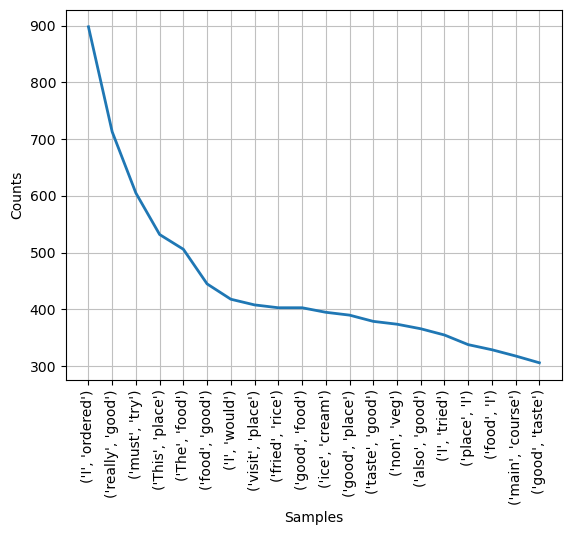

<Axes: xlabel='Samples', ylabel='Counts'>

In [53]:
fd_bigrams.plot(20)

In [54]:
tri_grams= trigrams(total_reviews_1D)

In [55]:
fd_trigrams = FreqDist()

for trigram in tri_grams:
    fd_trigrams[trigram] = fd_trigrams[trigram] + 1

In [56]:
fd_trigrams.most_common(20)

[(('paneer', 'tikka', 'biriyani'), 88),
 (('veg', 'non', 'veg'), 80),
 (('I', 'ordered', 'food'), 75),
 (('south', 'Indian', 'food'), 74),
 (('must', 'visit', 'place'), 72),
 (('I', 'would', 'recommend'), 63),
 (('The', 'food', 'good'), 63),
 (('paneer', 'butter', 'masala'), 62),
 (('Good', 'food', 'Good'), 60),
 (('I', 'ordered', 'chicken'), 60),
 (('delious', 'good', 'need'), 58),
 (('good', 'need', 'sum'), 58),
 (('need', 'sum', 'spacy'), 58),
 (('sum', 'spacy', 'food'), 58),
 (('spacy', 'food', 'bangnda'), 58),
 (('food', 'bangnda', 'fry'), 58),
 (('bangnda', 'fry', 'received'), 58),
 (('fry', 'received', 'Nice'), 58),
 (('I', 'visited', 'place'), 57),
 (('The', 'ambience', 'good'), 56)]

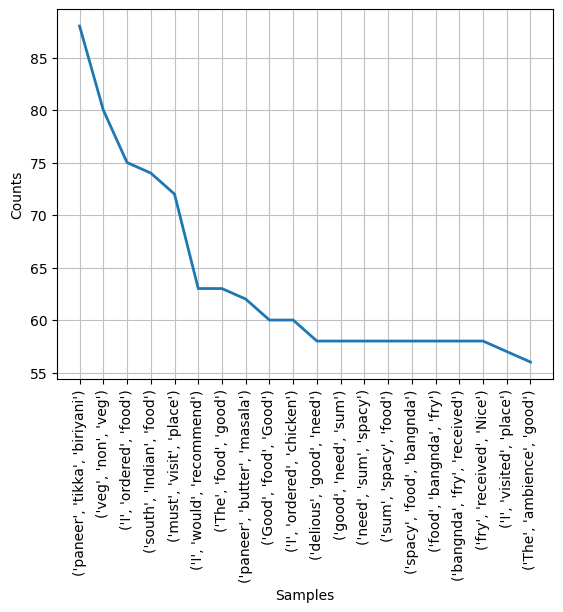

<Axes: xlabel='Samples', ylabel='Counts'>

In [170]:
fd_trigrams.plot(20)

In [172]:
!pip install geocoder
!pip install geopy


   ---------------------------------------- 0.0/98.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/98.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/98.6 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/98.6 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/98.6 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/98.6 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/98.6 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/98.6 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/98.6 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/98.6 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/98.6 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/98.6 kB ? eta -:--:--
   ------------ --------------------------- 30.7/98.6 kB 46.9 kB/s eta 0:00:02
   ------------ --------------------------- 30.7/98.6 kB 46.9 kB/s eta 0

In [178]:
df['location']

0                      Banashankari
1                      Banashankari
2                      Banashankari
3                      Banashankari
4                      Basavanagudi
                    ...            
51712                    Whitefield
51713                    Whitefield
51714                    Whitefield
51715    ITPL Main Road, Whitefield
51716    ITPL Main Road, Whitefield
Name: location, Length: 51717, dtype: object

In [180]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', None, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan

In [182]:
len(df['location'].unique())

94

In [186]:
df['location'] = df['location'] + " ,Bangalore , Karnataka , India"

In [188]:
df['location']

0              Banashankari ,Bangalore , Karnataka , India
1              Banashankari ,Bangalore , Karnataka , India
2              Banashankari ,Bangalore , Karnataka , India
3              Banashankari ,Bangalore , Karnataka , India
4              Basavanagudi ,Bangalore , Karnataka , India
                               ...                        
51712            Whitefield ,Bangalore , Karnataka , India
51713            Whitefield ,Bangalore , Karnataka , India
51714            Whitefield ,Bangalore , Karnataka , India
51715    ITPL Main Road, Whitefield ,Bangalore , Karnat...
51716    ITPL Main Road, Whitefield ,Bangalore , Karnat...
Name: location, Length: 51717, dtype: object

In [190]:
df['location'].unique()

array(['Banashankari ,Bangalore , Karnataka , India',
       'Basavanagudi ,Bangalore , Karnataka , India',
       'Mysore Road ,Bangalore , Karnataka , India',
       'Jayanagar ,Bangalore , Karnataka , India',
       'Kumaraswamy Layout ,Bangalore , Karnataka , India',
       'Rajarajeshwari Nagar ,Bangalore , Karnataka , India',
       'Vijay Nagar ,Bangalore , Karnataka , India',
       'Uttarahalli ,Bangalore , Karnataka , India',
       'JP Nagar ,Bangalore , Karnataka , India',
       'South Bangalore ,Bangalore , Karnataka , India',
       'City Market ,Bangalore , Karnataka , India',
       'Nagarbhavi ,Bangalore , Karnataka , India',
       'Bannerghatta Road ,Bangalore , Karnataka , India',
       'BTM ,Bangalore , Karnataka , India',
       'Kanakapura Road ,Bangalore , Karnataka , India',
       'Bommanahalli ,Bangalore , Karnataka , India', nan,
       'CV Raman Nagar ,Bangalore , Karnataka , India',
       'Electronic City ,Bangalore , Karnataka , India',
       'HSR ,Ba

In [192]:
df_copy = df.copy()

In [194]:
df_copy['location'].isnull().sum()

21

In [198]:
df_copy = df_copy.dropna(subset=['location'])

In [200]:
df_copy['location'].isnull().sum()

0

In [204]:
locations =pd.DataFrame(df_copy['location'].unique())

In [206]:
locations.columns = ['name']

In [208]:
locations

,name
0,"Banashankari ,Bangalore , Karnataka , India"
1,"Basavanagudi ,Bangalore , Karnataka , India"
2,"Mysore Road ,Bangalore , Karnataka , India"
3,"Jayanagar ,Bangalore , Karnataka , India"
4,"Kumaraswamy Layout ,Bangalore , Karnataka , India"
...,...
88,"West Bangalore ,Bangalore , Karnataka , India"
89,"Magadi Road ,Bangalore , Karnataka , India"
90,"Yelahanka ,Bangalore , Karnataka , India"
91,"Sahakara Nagar ,Bangalore , Karnataka , India"


In [210]:
from geopy.geocoders import Nominatim

In [212]:
geolocator = Nominatim(user_agent = "app" ,timeout = None)

In [214]:
lat = []
lon = []

for location in locations['name']:
    location = geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)

In [216]:
locations['latitude'] = lat
locations['longitude'] = lon


In [218]:
locations

,name,latitude,longitude
0,"Banashankari ,Bangalore , Karnataka , India",12.939333,77.553982
1,"Basavanagudi ,Bangalore , Karnataka , India",12.941726,77.575502
2,"Mysore Road ,Bangalore , Karnataka , India",12.952813,77.541528
3,"Jayanagar ,Bangalore , Karnataka , India",12.939904,77.582638
4,"Kumaraswamy Layout ,Bangalore , Karnataka , India",12.906768,77.559502
...,...,...,...
88,"West Bangalore ,Bangalore , Karnataka , India",13.009476,77.553089
89,"Magadi Road ,Bangalore , Karnataka , India",12.975653,77.555355
90,"Yelahanka ,Bangalore , Karnataka , India",13.100698,77.596345
91,"Sahakara Nagar ,Bangalore , Karnataka , India",13.062147,77.580061


In [222]:
locations.isnull().sum()

name         0
latitude     2
longitude    2
dtype: int64

In [230]:
locations[locations['latitude'].isna()]

,name,latitude,longitude


In [232]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [234]:
locations['latitude'][79] = 13.0184435
locations['longitude'][79] = 77.67812149999997
locations['latitude'][85] = 13.0055949776
locations['longitude'][85] =77.5749977


In [238]:
df['cuisines'].isnull().sum()

45

In [240]:
df = df.dropna(subset= ['cuisines'])

In [242]:
df['cuisines']

0                North Indian, Mughlai, Chinese
1                   Chinese, North Indian, Thai
2                        Cafe, Mexican, Italian
3                    South Indian, North Indian
4                      North Indian, Rajasthani
                          ...                  
51712                               Continental
51713                               Finger Food
51714                               Finger Food
51715                               Finger Food
51716    Finger Food, North Indian, Continental
Name: cuisines, Length: 51672, dtype: object

In [246]:
north_india = df[df['cuisines'].str.contains('North Indian')]

In [248]:
north_india.shape

(21085, 18)

In [300]:
north_india_rest_count = north_india.location.value_counts().reset_index().rename(columns={ 'location' :'name'})

In [306]:
heatmap_df = north_india_rest_count.merge(locations , on ='name', how = 'left')

In [308]:
heatmap_df

,name,count,latitude,longitude
0,"BTM ,Bangalore , Karnataka , India",2469,12.916360,77.604733
1,"HSR ,Bangalore , Karnataka , India",1123,12.900563,77.649475
2,"Whitefield ,Bangalore , Karnataka , India",1059,12.969637,77.749745
3,"Marathahalli ,Bangalore , Karnataka , India",1038,12.955257,77.698416
4,"JP Nagar ,Bangalore , Karnataka , India",958,12.909694,77.586607
...,...,...,...,...
85,"Hebbal ,Bangalore , Karnataka , India",4,13.038218,77.591900
86,"Jakkur ,Bangalore , Karnataka , India",3,13.078474,77.606894
87,"Central Bangalore ,Bangalore , Karnataka , India",2,12.973393,77.611247
88,"West Bangalore ,Bangalore , Karnataka , India",1,13.009476,77.553089


In [321]:
import folium

In [325]:
basemap = folium.Map()

In [327]:
basemap

In [331]:
from folium.plugins import HeatMap

In [333]:
HeatMap(heatmap_df[['latitude','longitude','count']]).add_to(basemap)

In [335]:
basemap

In [339]:
def get_heatmap(cuisine):
    cuisine_df = df[df['cuisines'].str.contains(cuisine)]
    cuisine_rest_count = cuisine_df.location.value_counts().reset_index().rename(columns={ 'location' :'name'})
    heatmap_df = cuisine_rest_count.merge(locations , on ='name', how = 'left')
    print(heatmap_df.head(4))

    basemap = folium.Map()
    HeatMap(heatmap_df[['latitude','longitude','count']]).add_to(basemap)
    return basemap

In [341]:
get_heatmap('South Indian')

                                       name  count   latitude  longitude
0        BTM ,Bangalore , Karnataka , India    815  12.916360  77.604733
1   JP Nagar ,Bangalore , Karnataka , India    437  12.909694  77.586607
2        HSR ,Bangalore , Karnataka , India    436  12.900563  77.649475
3  Jayanagar ,Bangalore , Karnataka , India    416  12.939904  77.582638
